#### 인구 데이터 분석
- 주민등록 인구통계 : https://jumin.mois.go.kr/#

In [8]:
import matplotlib.pyplot as plt

# 한글 폰트 깨짐 해결 - 기본 폰트로 '맑은 고딕' 사용
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

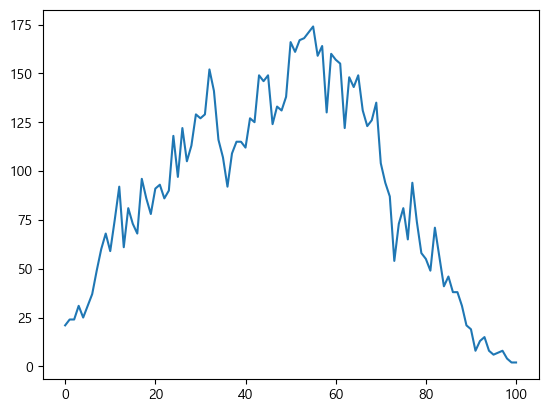

In [14]:
# 우리 동네의 연령대별 인구 통계

import csv

data = csv.reader(open('age2022.csv'))
next(data)
x = []
for row in data :
    if '부암동' in row[0] : 
        for i in range(3, 104) :
            x.append(int(row[i]))

plt.plot(x)
plt.show()

인구구조 변화가 궁금한 지역을 입력해주세요! :  부암동


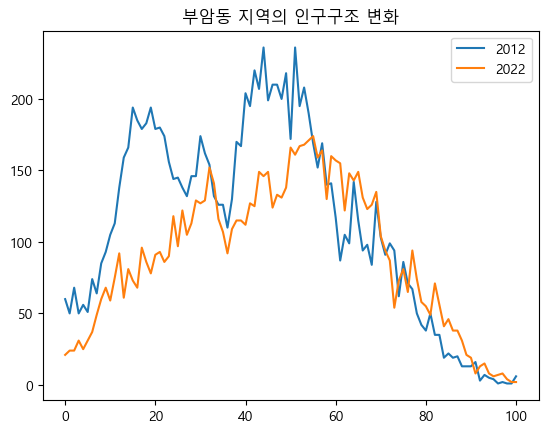

In [9]:
# 10년 전 데이터와 비교하려면?

x1 = []
x2 = []
name = input('인구구조 변화가 궁금한 지역을 입력해주세요! : ')

with open("age2012.csv", mode='r', encoding='utf-8') as file1 :
    data1 = csv.reader(file1)
    next(data1)
    for row in data1 :
        if name in row[0] : 
            for i in range(3, 104) :
                x1.append(int(row[i]))

data2 = csv.reader(open('age2022.csv'))
next(data2)
for row in data2 :
    if name in row[0] : 
        for i in range(3, 104) :
            x2.append(int(row[i]))
                
plt.title(name + ' 지역의 인구구조 변화')
plt.plot(x1, label = '2012')
plt.plot(x2, label = '2022')
plt.legend()
plt.show()

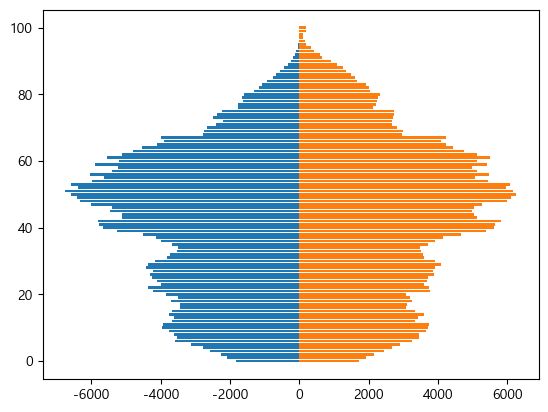

In [21]:
# 제주도는 정말 삼다도(돌, 바람, 여자)일까요? 여성 인구가 정말 더 많을까?

m = []
f = []
with open("age_gender.csv", mode='r', encoding='utf-8') as file :
    data = csv.reader(file)
    next(data)
    for row in data :
        if '제주특별자치도' in row[0] : 
            for i in range(3, 104) :
                m.append(-int(row[i]))
                f.append(int(row[i+103])) # 여성의 연령대별 인구 현황
            break

plt.barh(range(101), m)
plt.barh(range(101), f)
plt.show()

In [17]:
# 이것이 과연 최선일까요?

m = 0
f = 0
with open("age_gender.csv", mode='r', encoding='utf-8') as file :
    data = csv.reader(file)
    next(data)
    for row in data :
        if '제주특별자치도' in row[0] : 
            for i in range(3, 104) :
                m = m + int(row[i])
                f = f + int(row[i+103])
            break

print(m, f)

339578 338188


In [18]:
# 문제 해결해보기 - 과거 데이터 활용

m = 0
f = 0
with open("age_gender2008.csv", mode='r', encoding='utf-8') as file :
    data = csv.reader(file)
    next(data)
    for row in data :
        if '제주특별자치도' in row[0] : 
            for i in range(3, 104) :
                m = m + int(row[i])
                f = f + int(row[i+103])
            break

print(m, f)

279359 280181


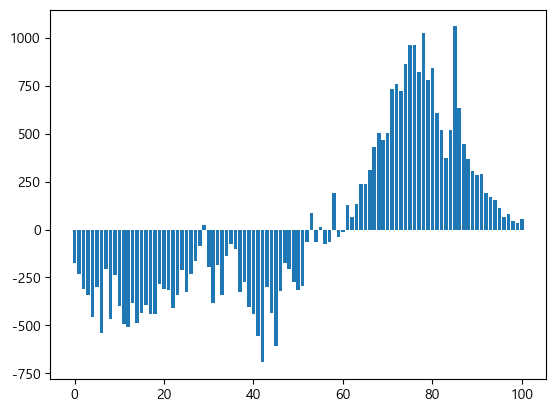

In [20]:
# 문제 해결해보기 - 시각화

c = []
with open("age_gender2008.csv", mode='r', encoding='utf-8') as file :
    data = csv.reader(file)
    next(data)
    for row in data :
        if '제주특별자치도' in row[0] : 
            for i in range(3, 104) :
                c.append(int(row[i+103]) - int(row[i]))
            break

plt.bar(range(101), c)
plt.show()

In [22]:
# 우리 동네와 인구 구조가 가장 비슷한 지역은 어디일까요?
# 데이터 준비
!git clone https://github.com/greatsong/2020dataset

Cloning into '2020dataset'...


In [23]:
cd 2020dataset

C:\Users\evie\2020dataset


##### 어떤 과정을 거치면 우리 동네 인구구조와 가장 비슷한 지역을 찾을 수 있을까?
1) 계획대로 한 번에 완성되는 경우는 아주 아주 드물다(없다고 보면 됨)
2) 일단 가장 기본적인 부분(minimal viable product)부터 작게 만들어보고 점점 확대시켜나가는 것이 일반적
3) trial & error를 통해 배우며 성장하는 것이 핵심

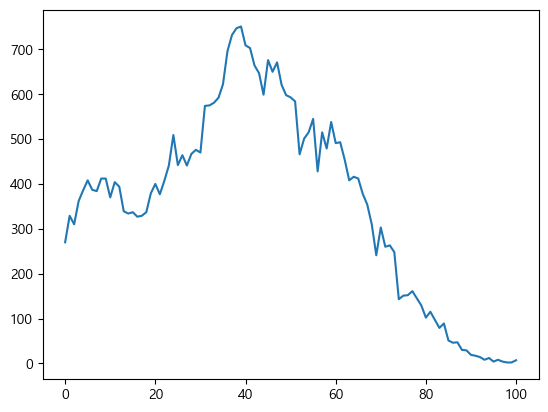

In [26]:
# '신도림동'이라는 이름이 포함된 지역의 인구 구조 그래프 그리기(minimal viable product)

data = csv.reader(open('age.csv'))
next(data)
result = []
for row in data :
    if '신도림동' in row[0] : 
        for i in range(3, 104) :
            result.append(int(row[i]))
            
plt.plot(result)
plt.show()

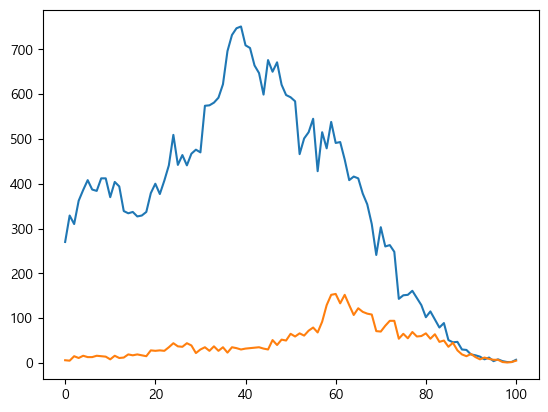

In [28]:
# 다른 지역의 인구 구조와 비교하기

data = csv.reader(open('age.csv'))
next(data)
result1 = []
result2 = []
for row in data :
    if '신도림동' in row[0] : 
        for i in range(3, 104) :
            result1.append(int(row[i]))
    if '화촌면' in row[0] : 
        for i in range(3, 104) :
            result2.append(int(row[i]))
            
plt.plot(result1)
plt.plot(result2)
plt.show()

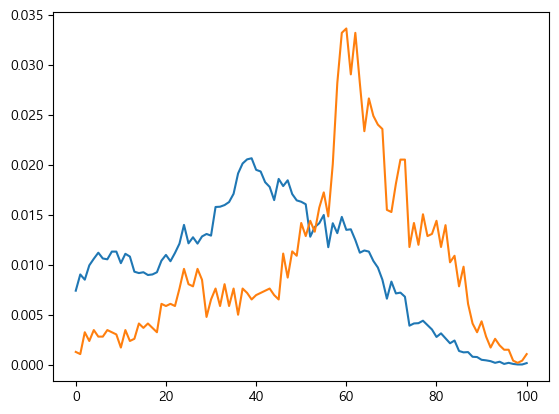

In [29]:
# 문제 발견 및 개선 1 - 다른 지역과의 차이 비교를 위해 oo로 표현하기

data = csv.reader(open('age.csv'))
next(data)
result1 = []
result2 = []
for row in data :
    if '신도림동' in row[0] : 
        for i in range(3, len(row)) :
            result1.append(int(row[i])/int(row[2])) # 연령대가 차지하는 비율
    if '화촌면' in row[0] : 
        for i in range(3, 104) :
            result2.append(int(row[i])/int(row[2]))

plt.plot(result1)
plt.plot(result2)
plt.show()

##### 문제 정의하기 : 인구구조가 가장 비슷하다는 것은?
$$ s = \sum 기준지역의 해당 연령값 - 각 지역의 해당 연령값 $$

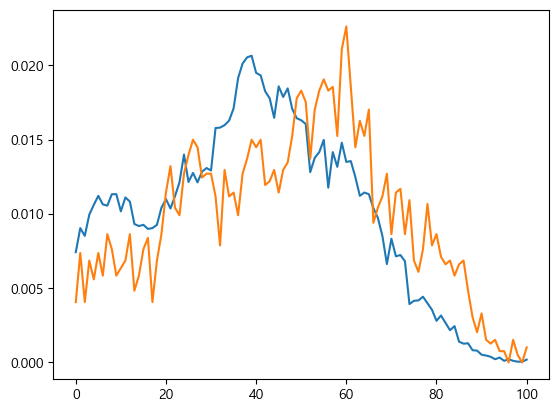

In [31]:
data = csv.reader(open('age.csv'))
next(data)
next(data)
data = list(data)
pivot = []

for row in data :
    if '신도림동' in row[0] : 
        for i in range(3, len(row)) :
            pivot.append(int(row[i])/int(row[2])) # 연령대가 차지하는 비율
mn = 10000000

for row in data :
    s = 0
    for i in range(3, len(row)) :
        tmp = int(row[i]) - pivot[i-3]
        s = s + tmp
    if s < mn :
        result = []
        for i in range(3, len(row)) :
            result.append(int(row[i])/int(row[2]))

plt.plot(pivot)
plt.plot(result)
plt.show()

##### 문제 다시 정의하기 : 문제 발견 및 개선 2! (*L2 norm)
$$ s = \sum (기준지역의 해당 연령값 - 각 지역의 해당 연령값)^{2} $$

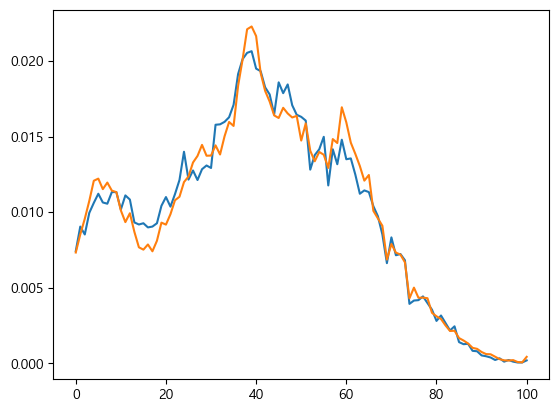

In [36]:
data = csv.reader(open('age.csv'))
next(data)
next(data)
data = list(data)
pivot = []

for row in data :
    if '신도림동' in row[0] : 
        for i in range(3, len(row)) :
            pivot.append(int(row[i])/int(row[2])) # 연령대가 차지하는 비율
mn = 1

for row in data :
    s = 0
    # 오차 계산
    for i in range(3, len(row)) :
        row[i] = int(row[i])/int(row[2]) # 비율로 변환
        tmp = (row[i] - pivot[i-3]) ** 2 # 두 값의 차이를 제곱
        s = s + tmp # 차이 제곱의 누적합
    # 역대 최소 오차를 업데이트
    if s < mn and ('신도림동' not in row[0]) :
        result = []
        for i in range(3, len(row)) :
            result.append(row[i])
        mn = s

plt.plot(pivot)
plt.plot(result)
plt.show()

##### 사용자가 보기 편한 그래프로 바꾸기

궁금한 지역 이름을 입력해주세요. :  마북동


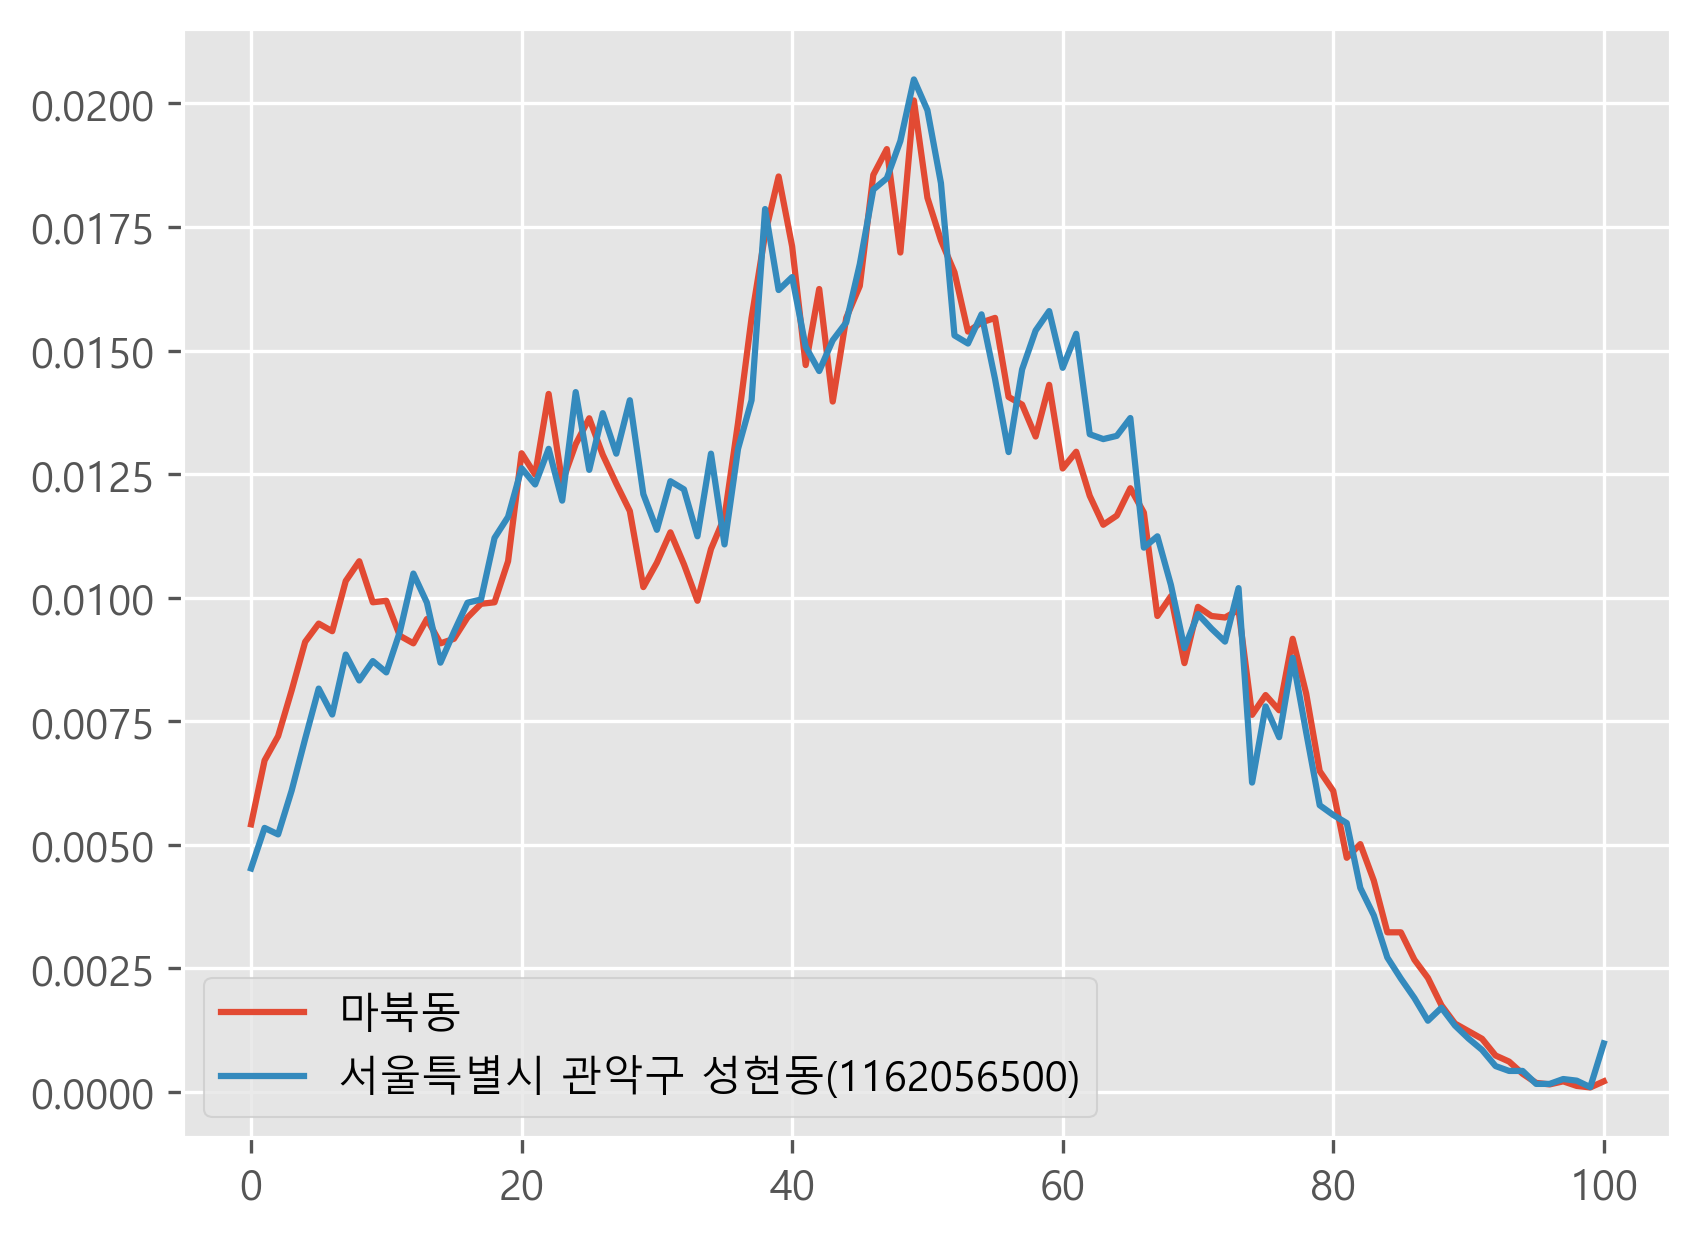

In [41]:
data = csv.reader(open('age.csv'))
next(data)
next(data)
data = list(data)
pivot = []

name = input('궁금한 지역 이름을 입력해주세요. : ')

for row in data :
    if name in row[0] : 
        for i in range(3, len(row)) :
            pivot.append(int(row[i])/int(row[2])) # 연령대가 차지하는 비율
mn = 10000

for row in data :
    s = 0
    # 오차 계산
    for i in range(3, len(row)) :
        row[i] = int(row[i])/int(row[2]) # 비율로 변환
        tmp = (row[i] - pivot[i-3]) ** 2 # 두 값의 차이를 제곱
        s = s + tmp # 차이 제곱의 누적합
    # 역대 최소 오차를 업데이트
    if s < mn and (name not in row[0]) :
        result = []
        for i in range(3, len(row)) :
            result.append(row[i])
        mn = s
        result_name = row[0]

plt.figure(dpi = 300)
plt.style.use('ggplot')
plt.plot(pivot, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()